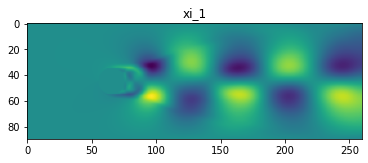

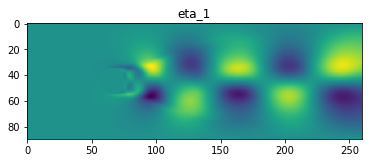

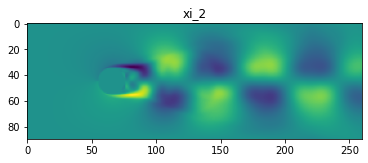

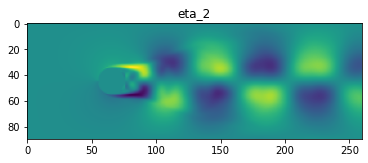

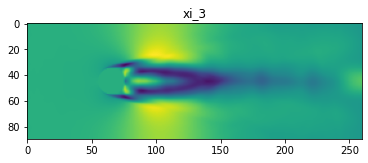

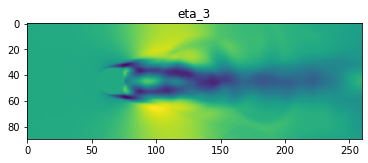

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import scipy as sp
import scipy.io
import matplotlib.pyplot as plt

from addPath import *
addPath()

from d3s import algorithms

plt.ion()

# the data was generated by the Python code available at http://wiki.palabos.org/numerics:codes

#%% load variables from mat file into main scope
data = sp.io.loadmat('data/vonKarman.mat', squeeze_me=True)
for s in data.keys():
    if s[:2] == '__' and s[-2:] == '__': continue
    exec('%s = data["%s"]' % (s, s))

#%% apply CMD
nx, ny, m = x.shape
x = x.reshape([nx*ny, m])
X = x[:, :-1]
Y = x[:, 1:]

rho, Xi, Eta = algorithms.cmd(X, Y, evs=5, epsilon=10)

#%% plot CMD modes
for i in range(3):
    plt.figure()
    xi = np.real(Xi[:, i].reshape(nx, ny))
    plt.imshow(xi)
    plt.title('xi_%i' % (i+1))
    
    plt.figure()
    eta = np.real(Eta[:, i].reshape(nx, ny))
    plt.imshow(eta)
    plt.title('eta_%i' % (i+1))
    
plt.show()